In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv(r'Desktop/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
variable = df['class'] 

In [36]:
statistics = variable.describe()
print(statistics)


count       891
unique        3
top       Third
freq        491
Name: class, dtype: object


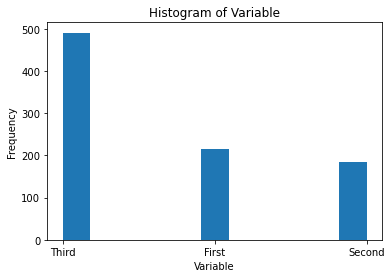

In [37]:
plt.hist(variable, bins='auto')
plt.xlabel('Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Variable')
plt.show()


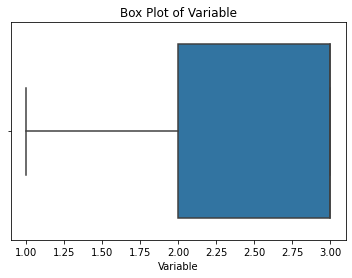

In [38]:
sns.boxplot(x=df['pclass'])
plt.xlabel('Variable')
plt.title('Box Plot of Variable')
plt.show()


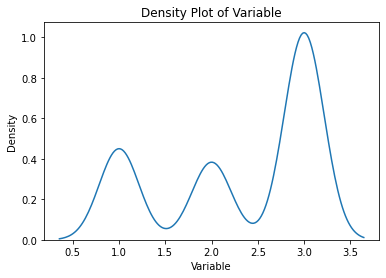

In [39]:
sns.kdeplot(x=df['pclass'])
plt.xlabel('Variable')
plt.ylabel('Density')
plt.title('Density Plot of Variable')
plt.show()


In [40]:
variable1 = df['sex']
variable2 = df['age']


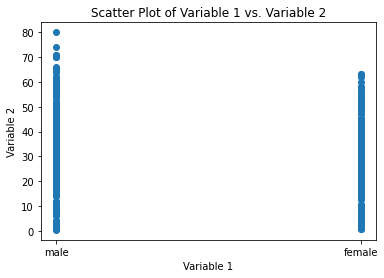

In [41]:
plt.scatter(variable1, variable2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Scatter Plot of Variable 1 vs. Variable 2')
plt.show()


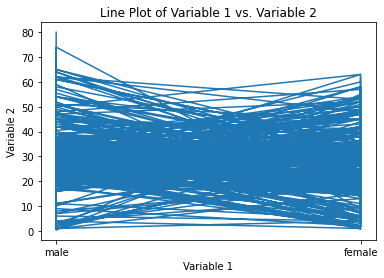

In [42]:
plt.plot(variable1, variable2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Line Plot of Variable 1 vs. Variable 2')
plt.show()


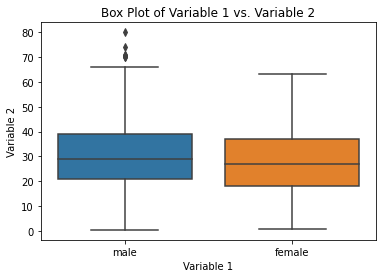

In [43]:
sns.boxplot(x=variable1, y=variable2)
plt.xlabel('Variable 1')
plt.ylabel('Variable 2')
plt.title('Box Plot of Variable 1 vs. Variable 2')
plt.show()


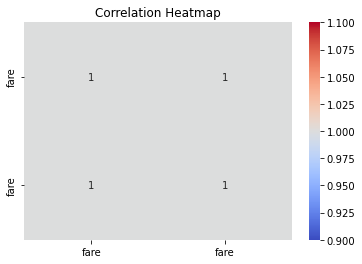

In [44]:
correlation_matrix = df[['fare', 'fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [45]:
variables_of_interest = df[['sex', 'age', 'fare']] 

In [46]:
correlation_matrix = variables_of_interest.corr()


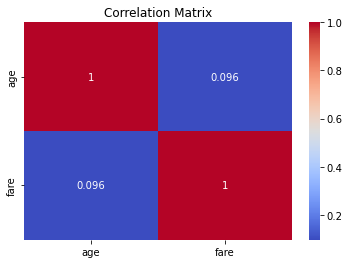

In [47]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


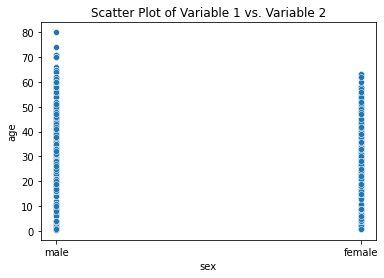

In [48]:
sns.scatterplot(x='sex', y='age', data=df)
plt.title('Scatter Plot of Variable 1 vs. Variable 2')
plt.show()


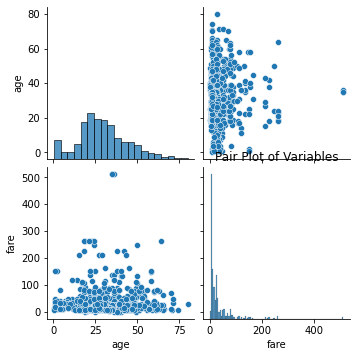

In [49]:
sns.pairplot(df[['sex', 'age', 'fare']])
plt.title('Pair Plot of Variables')
plt.show()


In [50]:
statistics1 = df.describe(include='all')
print(statistics1)


          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [51]:
print(df.isnull().sum())
df.dropna(axis=0, inplace=True)
threshold = 0.5  # Set the threshold for missing values
df.dropna(thresh=len(df) * threshold, axis=1, inplace=True)
df.fillna(value=0, inplace=True)  # Replace missing values with 0



survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [52]:
numerical_vars = ['survived', 'pclass', 'age', 'sibsp','parch','fare']  


In [53]:

# Interquartile range (IQR) method
Q1 = df[numerical_vars].quantile(0.25)
Q3 = df[numerical_vars].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_indices = np.where((df[numerical_vars] < lower_bound) | (df[numerical_vars] > upper_bound))


In [55]:
constant_value = 999  # Replace with the desired constant value
df_cleaned = df.copy()
df_cleaned.iloc[outlier_indices] = constant_value



In [56]:
categorical_columns = df.select_dtypes(include='object').columns


In [57]:
one_hot_encoded = pd.get_dummies(df[categorical_columns])


In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [59]:
ordinal_mapping = {'low': 0, 'medium': 1, 'high': 2}  # Replace with your desired mapping

for column in categorical_columns:
    df[column] = df[column].map(ordinal_mapping)


In [60]:
dependent_variable = 'alone'  
X = df.drop(dependent_variable, axis=1)  # Independent variables (all columns except the dependent variable)
y = df[dependent_variable]  # Dependent variable



In [61]:
independent_variables = df.drop(dependent_variable, axis=1)  # Replace 'dependent_variable' with the name of your dependent variable column



In [62]:
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = StandardScaler()
scaled_independent_variables = pd.DataFrame(scaler.fit_transform(independent_variables), columns=independent_variables.columns)


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [64]:
scaler = MinMaxScaler()
scaled_independent_variables = pd.DataFrame(scaler.fit_transform(independent_variables), columns=independent_variables.columns)


C:\Users\ayush\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\ayush\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [65]:
X = df.drop(dependent_variable, axis=1)  # Independent variables
y = df[dependent_variable]  # Dependent variable


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
X_train


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
331,0,1,NaN,45.5,0,0,28.5000,NaN,NaN,NaN,True,NaN,NaN,NaN
336,0,1,NaN,29.0,1,0,66.6000,NaN,NaN,NaN,True,NaN,NaN,NaN
193,1,2,NaN,3.0,1,1,26.0000,NaN,NaN,NaN,False,NaN,NaN,NaN
75,0,3,NaN,25.0,0,0,7.6500,NaN,NaN,NaN,True,NaN,NaN,NaN
248,1,1,NaN,37.0,1,1,52.5542,NaN,NaN,NaN,True,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,1,1,NaN,44.0,0,1,57.9792,NaN,NaN,NaN,False,NaN,NaN,NaN
92,0,1,NaN,46.0,1,0,61.1750,NaN,NaN,NaN,True,NaN,NaN,NaN
462,0,1,NaN,47.0,0,0,38.5000,NaN,NaN,NaN,True,NaN,NaN,NaN
879,1,1,NaN,56.0,0,1,83.1583,NaN,NaN,NaN,False,NaN,NaN,NaN


In [70]:
X_test


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive
118,0,1,NaN,24.00,0,1,247.5208,NaN,NaN,NaN,True,NaN,NaN,NaN
251,0,3,NaN,29.00,1,1,10.4625,NaN,NaN,NaN,False,NaN,NaN,NaN
742,1,1,NaN,21.00,2,2,262.3750,NaN,NaN,NaN,False,NaN,NaN,NaN
496,1,1,NaN,54.00,1,0,78.2667,NaN,NaN,NaN,False,NaN,NaN,NaN
712,1,1,NaN,48.00,1,0,52.0000,NaN,NaN,NaN,True,NaN,NaN,NaN
96,0,1,NaN,71.00,0,0,34.6542,NaN,NaN,NaN,True,NaN,NaN,NaN
139,0,1,NaN,24.00,0,0,79.2000,NaN,NaN,NaN,True,NaN,NaN,NaN
337,1,1,NaN,41.00,0,0,134.5000,NaN,NaN,NaN,False,NaN,NaN,NaN
572,1,1,NaN,36.00,0,0,26.3875,NaN,NaN,NaN,True,NaN,NaN,NaN
487,0,1,NaN,58.00,0,0,29.7000,NaN,NaN,NaN,True,NaN,NaN,NaN


In [71]:
y_train


331     True
336    False
193    False
75      True
248    False
       ...  
523    False
92     False
462     True
879    False
512     True
Name: alone, Length: 145, dtype: bool

In [72]:
y_test

118    False
251    False
742    False
496    False
712    False
96      True
139     True
337     True
572     True
487     True
486    False
765    False
340    False
550    False
262    False
97     False
291    False
627     True
492     True
307    False
857     True
599    False
707     True
183    False
54     False
609     True
318    False
110     True
789     True
701     True
835    False
305    False
456     True
430     True
332    False
177     True
585    False
Name: alone, dtype: bool